In [1]:
import pandas as pd
import spacy, json
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
df = pd.read_json(open("data.json", "r", encoding="utf8"))

with open('themes.json', 'r') as f:
    theme_codes = json.load(f)

In [3]:
df.head()

,title,url,author,year,text,themes
0,"[28, 508, 152, 720]",https://poets.org/poem/body-and-soul-ii,602,2002,"[2221, 1012, 2, 2221, 273, 902, 128, 472, 57, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[2668],https://poets.org/poem/novel,311,2002,"[286, 3904, 1, 2778, 249, 19, 1268, 643, 410, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[178],https://poets.org/poem/flying,3478,2002,"[12, 602, 11, 1574, 197, 113, 402, 13, 2428, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1113, 2862, 88, 289, 1171, 2335]",https://poets.org/poem/photograph-people-danci...,2361,2002,"[267, 16, 35, 5, 5, 27, 1229, 1823, 3196, 48, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[246, 1113]",https://poets.org/poem/war-photograph,2125,2002,"[596, 50, 124, 467, 163, 612, 133, 77, 29, 44,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
texts_len = df['text'].apply(len)
df.drop(df[texts_len<50].index, inplace=True)

In [5]:
max_len = 150  # max length of string
max_features = 5001

In [6]:
joined_text = df['title'] + df['text']
X = keras.preprocessing.sequence.pad_sequences(list(joined_text), maxlen=max_len, padding='post')

In [7]:
themes_to_predict = ['nature', 'family', 'love', 'body', 'animals']

In [8]:
bin_models = {}
for theme in themes_to_predict:
    bin_models['model_' + theme] = keras.models.load_model('baby_models/model_' + theme + '.h5')

In [9]:
X

array([[  28,  508,  152, ...,    0,    0,    0],
       [2668,  286, 3904, ...,    0,    0,    0],
       [ 178,   12,  602, ...,    0,    0,    0],
       ...,
       [  66,   88,   88, ...,    0,    0,    0],
       [  66,  180,    8, ...,    0,    0,    0],
       [   4, 3966, 1337, ...,    0,    0,    0]], dtype=int32)

Theme #: nature
35/35 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9910 - auc: 0.0000e+00
Test Score Model1: 0.16185005009174347
Test Accuracy Model1: 0.9909991025924683
Theme #: family
35/35 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9775 - auc_1: 0.5561
Test Score Model1: 0.20656675100326538
Test Accuracy Model1: 0.9774977564811707
Theme #: love
35/35 [==============================] - 0s 5ms/step - loss: 0.4335 - accuracy: 0.8929 - auc_2: 0.4743
Test Score Model1: 0.43353450298309326
Test Accuracy Model1: 0.8928892612457275
Theme #: body
35/35 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9928 - auc_3: 0.0000e+00
Test Score Model1: 0.11104116588830948
Test Accuracy Model1: 0.9927992820739746
Theme #: animals
35/35 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8857 - auc_4: 0.4842
Test Score Model1: 0.37107184529304504
Test Accuracy Model1: 0.8856885433197021


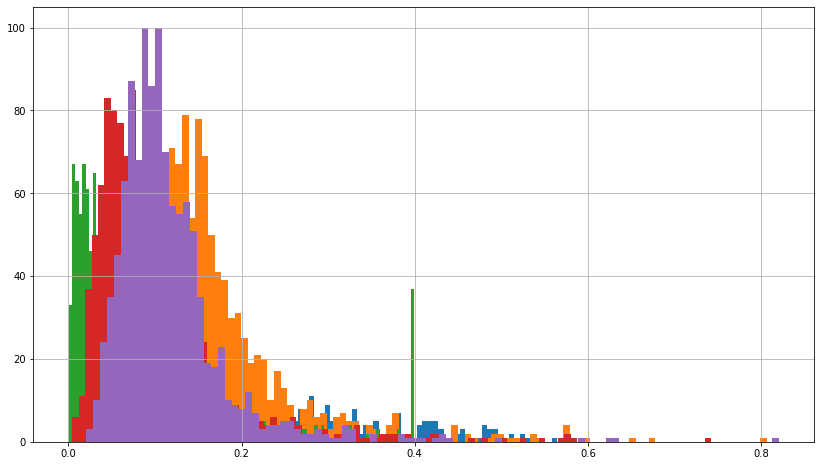

In [12]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, df['themes'], test_size=0.1, random_state=42)
for theme in themes_to_predict:
    print('Theme #:', theme)
    theme_index = theme_codes[theme]
    y_test = np.array([row[theme_index] for index, row in Y_test.items()])
    

    bin_mod = bin_models['model_' + theme]
    #print(np.array(X_test))
    score = bin_mod.evaluate(np.array(X_test), 
                             np.array(y_test)) 
    print("Test Score Model1:", score[0])
    print("Test Accuracy Model1:", score[1])
    y_pred = bin_mod.predict(X_test)
    
    pd.Series(y_pred.flatten()).hist(bins=100, figsize=(14, 8)).figure
